In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense , Conv2D

In [ ]:
import random
random.seed(0)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.datasets import mnist
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Label : 1


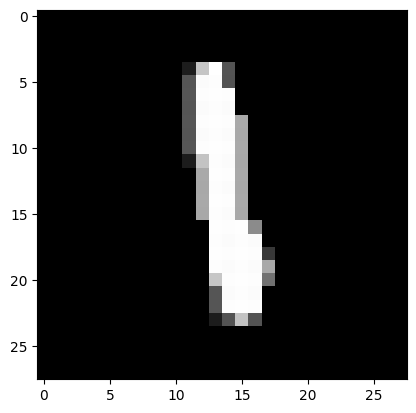

In [ ]:
import matplotlib.pyplot as plt
print("Label : {}".format(y_train[200]))
plt.imshow(X_train[200] , cmap = "gray")

In [ ]:
X_train = X_train.reshape(X_train.shape[0] , 28 , 28 , 1)
X_test = X_test.reshape(X_test.shape [0] , 28 , 28 , 1)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
X_train.dtype , X_test.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


In [ ]:
X_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


In [ ]:
from keras.utils import to_categorical , plot_model
y_train[0]

5

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.layers import Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32 , kernel_size = 3 ,activation = "relu" , input_shape = (28 , 28 , 1)))
model.add(Conv2D(filters = 32 , kernel_size = 3 ,activation = "relu"))
model.add(Flatten())
model.add(Dense(units = 128 , activation = "relu" ))
model.add(Dense(units = 10, activation = "softmax" ))

In [ ]:
model.compile(loss = "categorical_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

In [ ]:
T = model.fit(X_train , y_train , epochs = 10 , batch_size = 32 ,validation_split = 0.3 )

Epoch 1/10
1313/1313 [==============================] - 19s 10ms/step - loss: 0.1372 - accuracy: 0.9584 - val_loss: 0.0681 - val_accuracy: 0.9797
Epoch 2/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0584 - val_accuracy: 0.9822
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0618 - val_accuracy: 0.9822
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0692 - val_accuracy: 0.9822
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0615 - val_accuracy: 0.9857
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0693 - val_accuracy: 0.9851
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.0863 - val_accurac

In [ ]:
loss_accuracy = model.evaluate(X_train , y_train)
print("Training Accuracy : {}".format(loss_accuracy[1]*100))
print("Training Loss : {}".format(loss_accuracy[0]))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9949
Training Accuracy : 99.48833584785461
Training Loss : 0.02601359412074089


In [ ]:
loss_accuracy = model.evaluate(X_test , y_test)
print("Testing Accuracy : {}".format(loss_accuracy[1]*100))
print("Testing Loss : {}".format(loss_accuracy[0]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9865
Testing Accuracy : 98.65000247955322
Testing Loss : 0.06068500503897667


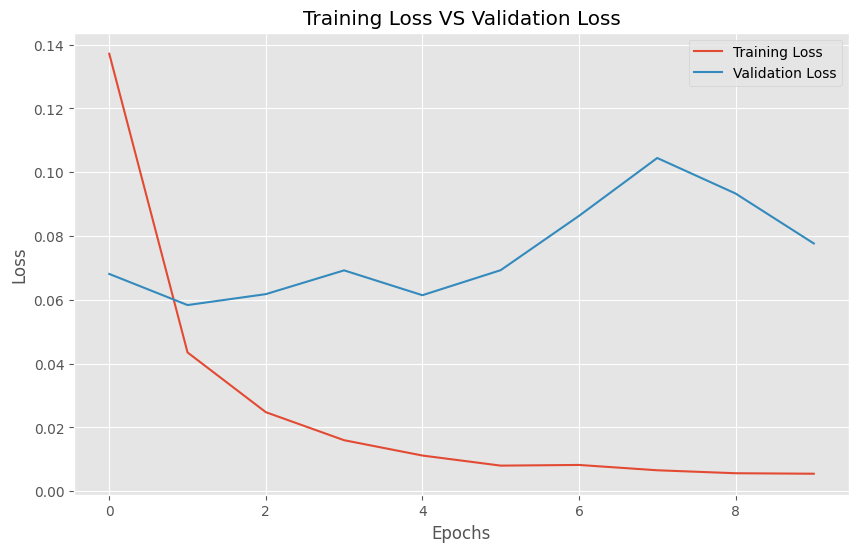

In [ ]:
epochs = np.arange(0 , len(T.history["loss"]))
plt.figure(figsize = (10,6))
plt.style.use("ggplot")
plt.plot(epochs , T.history["loss"] , label = "Training Loss")
plt.plot(epochs , T.history["val_loss"] , label = "Validation Loss")
plt.title("Training Loss VS Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ***Adding Max Pooling & Dropout ***

In [ ]:
from keras.layers import MaxPooling2D , Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32 , kernel_size = 3 ,activation = "relu" , input_shape = (28 , 28 , 1)))
model.add(Conv2D(filters = 32 , kernel_size = 3 ,activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 128 , activation = "relu" ))
model.add(Dense(units = 10, activation = "softmax" ))

model.compile(loss = "categorical_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

T = model.fit(X_train , y_train , epochs = 10 , batch_size = 32 ,validation_split = 0.3 )

Epoch 1/10
1313/1313 [==============================] - 10s 6ms/step - loss: 0.1521 - accuracy: 0.9537 - val_loss: 0.0591 - val_accuracy: 0.9821
Epoch 2/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0481 - val_accuracy: 0.9849
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0497 - val_accuracy: 0.9857
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0247 - accuracy: 0.9916 - val_loss: 0.0484 - val_accuracy: 0.9867
Epoch 5/10
1313/1313 [==============================] - 9s 6ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0469 - val_accuracy: 0.9871
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0512 - val_accuracy: 0.9877
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0134 - accuracy: 0.9953 - val_loss: 0.0511 - val_accuracy

In [ ]:
loss_accuracy = model.evaluate(X_train , y_train)
print("Training Accuracy : {}".format(loss_accuracy[1]*100))
print("Training Loss : {}".format(loss_accuracy[0]))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0213 - accuracy: 0.9954
Training Accuracy : 99.54166412353516
Training Loss : 0.021281752735376358


In [ ]:
loss_accuracy = model.evaluate(X_test , y_test)
print("Testing Accuracy : {}".format(loss_accuracy[1]*100))
print("Testing Loss : {}".format(loss_accuracy[0]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9890
Testing Accuracy : 98.90000224113464
Testing Loss : 0.04652503505349159


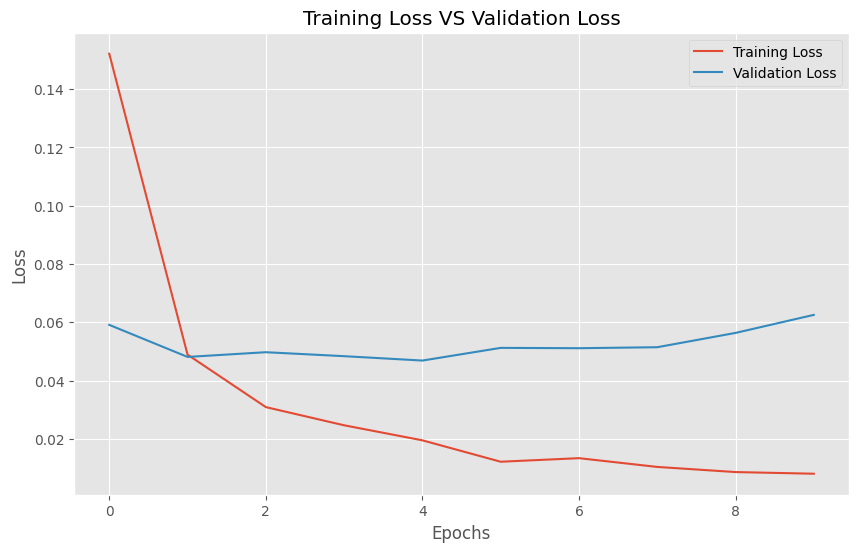

In [ ]:
epochs = np.arange(0 , len(T.history["loss"]))
plt.figure(figsize = (10,6))
plt.style.use("ggplot")
plt.plot(epochs , T.history["loss"] , label = "Training Loss")
plt.plot(epochs , T.history["val_loss"] , label = "Validation Loss")
plt.title("Training Loss VS Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ***Early Stopping***

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32 , kernel_size = 3 ,activation = "relu" , input_shape = (28 , 28 , 1)))
model.add(Conv2D(filters = 32 , kernel_size = 3 ,activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 128 , activation = "relu" ))
model.add(Dense(units = 10, activation = "softmax" ))

model.compile(loss = "categorical_crossentropy" , metrics = ["accuracy"] , optimizer = "adam")

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

T = model.fit(X_train , y_train , epochs = 10 , batch_size = 32 ,validation_split = 0.3 ,callbacks = [callback] )

Epoch 1/10
1313/1313 [==============================] - 9s 6ms/step - loss: 0.1505 - accuracy: 0.9545 - val_loss: 0.0666 - val_accuracy: 0.9802
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0587 - val_accuracy: 0.9828
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0530 - val_accuracy: 0.9849


In [ ]:
loss_accuracy = model.evaluate(X_train , y_train)
print("Training Accuracy : {}".format(loss_accuracy[1]*100))
print("Training Loss : {}".format(loss_accuracy[0]))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9913
Training Accuracy : 99.1349995136261
Training Loss : 0.028271377086639404


In [ ]:
loss_accuracy = model.evaluate(X_test , y_test)
print("Testing Accuracy : {}".format(loss_accuracy[1]*100))
print("Testing Loss : {}".format(loss_accuracy[0]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9871
Testing Accuracy : 98.71000051498413
Testing Loss : 0.03907790407538414


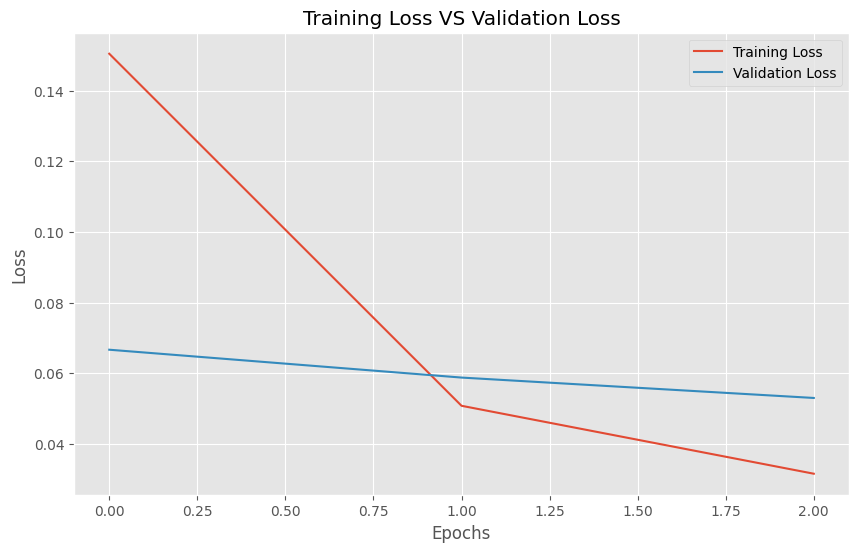

In [ ]:
epochs = np.arange(0 , len(T.history["loss"]))
plt.figure(figsize = (10,6))
plt.style.use("ggplot")
plt.plot(epochs , T.history["loss"] , label = "Training Loss")
plt.plot(epochs , T.history["val_loss"] , label = "Validation Loss")
plt.title("Training Loss VS Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ***Visualize Result Using Matplotlib***

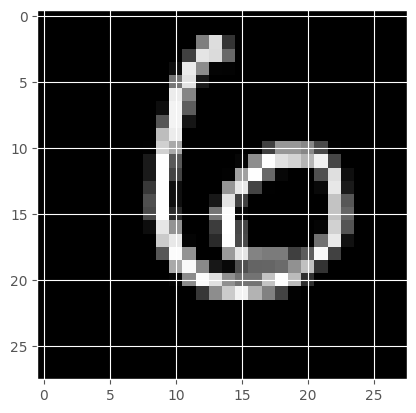

In [ ]:
plt.imshow(X_test[100] , cmap = "gray")

In [ ]:
y_pred = model.predict(X_test[100].reshape(1,28,28,1))

1/1 [==============================] - 0s 144ms/step


In [ ]:
y_pred

array([[5.43201502e-08, 1.19880425e-10, 3.54740881e-09, 1.15558896e-10,
        1.62140767e-09, 1.40159306e-09, 1.00000000e+00, 9.37968366e-12,
        5.16412524e-10, 3.98789196e-11]], dtype=float32)

In [ ]:
y_pred.max()

1.0

In [ ]:
y_pred.argmax()

6

In [ ]:
y_pred.sum()

1.0

# ***Summary***

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                      

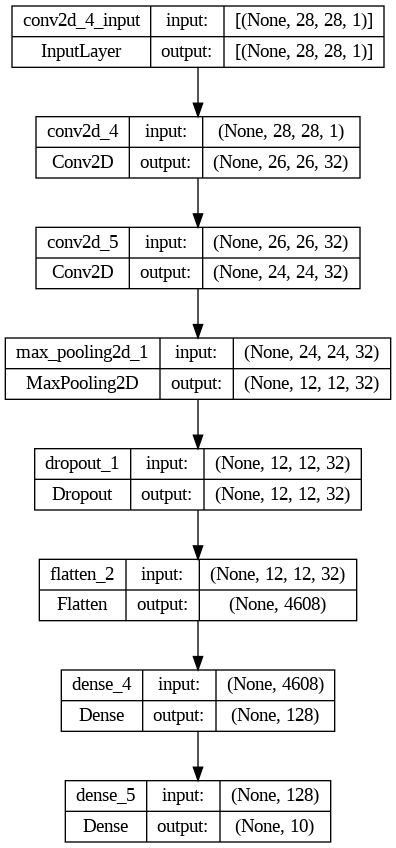

In [ ]:
plot_model(model ,  show_shapes = True ,to_file = "tahir.png" )